# Learning NN with MNIST Dataset

In [2]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from random import *

import torch
import torchvision
import torchvision.transforms as transforms

from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


In [3]:
#define out network
class Mnist(nn.Module):

    def __init__(self):
        super(Mnist, self).__init__()
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(784, 100)
        self.fc2 = nn.Linear(100, 10)

    def forward(self, x):
        x = self.fc1(x)
        x = F.sigmoid(x)
        x = self.fc2(x)
        x = F.sigmoid(x)
        return x
    
net = Mnist()
print(net)


Mnist(
  (fc1): Linear(in_features=784, out_features=100)
  (fc2): Linear(in_features=100, out_features=10)
)


## Test our network with random data and get it to learn something

In [4]:
input = Variable(torch.randn(1, 1, 784))
target = Variable(torch.arange(1, 11))  

optimizer = optim.SGD(net.parameters(), lr=0.01)
optimizer.zero_grad()   
output = net(input)
criterion = nn.MSELoss()
loss = criterion(output, target)
print('before optimize', loss)
loss.backward() # calculate gradient
optimizer.step() # update weight


before optimize Variable containing:
 33.1976
[torch.FloatTensor of size 1]



In [5]:
output = net(input)
criterion = nn.MSELoss()
loss = criterion(output, target)
print('after optimize', loss) # it number is smaller than before, therefore the network is learning something


after optimize Variable containing:
 32.8707
[torch.FloatTensor of size 1]



In [6]:
#we can trace the loss.grade_fn backwards through the network.
print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

In [7]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original', data_home="../data")


In [8]:
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

In [9]:
len(mnist.data)

70000

In [10]:
len(mnist.target)

70000

In [11]:
len(mnist.data[0])

784

(array([ 6903.,  7877.,  6990.,  7141.,  6824.,  6313.,  6876.,  7293.,
        13783.]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 9 Patch objects>)

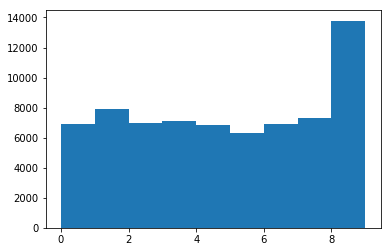

In [12]:
plt.hist(mnist.target, bins=range(10))

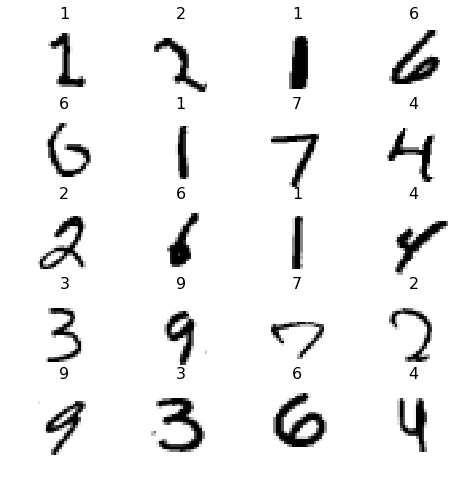

In [13]:
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    idx = randint(0, 70000)
    img =  mnist.data[idx].reshape((28,28))
    sp = fig.add_subplot(rows, columns , i)
    sp.axis('Off')
    sp.set_title(int(mnist.target[idx]), fontsize=16)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray_r')



In [14]:
len(mnist.data[0])

784

In [15]:
28*28

784

## Single Image Training

In [16]:
net = Mnist()
numbers = np.arange(10)

input_tensor = torch.from_numpy(np.array(mnist.data[0]).reshape(1,1,784))
target_tensor = torch.from_numpy((numbers == mnist.target[0]).astype(int).reshape(1,1,10))

input = torch.autograd.Variable(input_tensor).type(torch.FloatTensor)
target = torch.autograd.Variable(target_tensor).type(torch.FloatTensor)

optimizer = optim.SGD(net.parameters(), lr=0.01)
optimizer.zero_grad()   
output = net(input)
criterion = nn.MSELoss()
loss = criterion(output, target)
print('before optimize', loss, output)
loss.backward() # calculate gradient
optimizer.step() # update weight

output = net(input)
criterion = nn.MSELoss()
loss = criterion(output, target)
print('after optimize', loss, output)


before optimize Variable containing:
 0.2329
[torch.FloatTensor of size 1]
 Variable containing:
(0 ,.,.) = 

Columns 0 to 8 
   0.4746  0.5413  0.5543  0.3576  0.3746  0.4528  0.5420  0.5476  0.4391

Columns 9 to 9 
   0.4390
[torch.FloatTensor of size 1x1x10]

after optimize Variable containing:
 0.2273
[torch.FloatTensor of size 1]
 Variable containing:
(0 ,.,.) = 

Columns 0 to 8 
   0.4898  0.5452  0.5473  0.3497  0.3652  0.4399  0.5323  0.5536  0.4328

Columns 9 to 9 
   0.4353
[torch.FloatTensor of size 1x1x10]



As you can see the loss after is smaller than before. Also for the same input the probability for 0 is higher while others (note all) going down.

In [17]:
net = Mnist()
numbers = np.arange(10)

i1, i2 = np.array(mnist.data[0]), np.array(mnist.data[50000])
t1, t2 = (numbers == mnist.target[0]).astype(int), (numbers == mnist.target[50000]).astype(int)
input_tensor  = torch.from_numpy(np.concatenate((i1, i2)).reshape(2,1,784))
target_tensor = torch.from_numpy(np.concatenate((t1, t2)).reshape(2,1,10))

input = torch.autograd.Variable(input_tensor).type(torch.FloatTensor)
target = torch.autograd.Variable(target_tensor).type(torch.FloatTensor)

optimizer = optim.SGD(net.parameters(), lr=0.01)
optimizer.zero_grad()   
output = net(input)
criterion = nn.MSELoss()
loss = criterion(output, target)
print('before optimize', loss, output)
loss.backward() # calculate gradient
optimizer.step() # update weight

output = net(input)
criterion = nn.MSELoss()
loss = criterion(output, target)
print('after optimize', loss, output)


before optimize Variable containing:
 0.1837
[torch.FloatTensor of size 1]
 Variable containing:
(0 ,.,.) = 

Columns 0 to 8 
   0.6419  0.5733  0.4325  0.4596  0.3676  0.3910  0.3593  0.4050  0.4220

Columns 9 to 9 
   0.1767

(1 ,.,.) = 

Columns 0 to 8 
   0.6107  0.5599  0.4433  0.4364  0.3244  0.3948  0.3248  0.4901  0.4920

Columns 9 to 9 
   0.3017
[torch.FloatTensor of size 2x1x10]

after optimize Variable containing:
 0.1719
[torch.FloatTensor of size 1]
 Variable containing:
(0 ,.,.) = 

Columns 0 to 8 
   0.6804  0.5494  0.4130  0.4545  0.3488  0.3500  0.3191  0.3625  0.4483

Columns 9 to 9 
   0.1726

(1 ,.,.) = 

Columns 0 to 8 
   0.5744  0.5491  0.4398  0.4619  0.3252  0.3828  0.3092  0.5034  0.5131

Columns 9 to 9 
   0.2701
[torch.FloatTensor of size 2x1x10]



In [18]:
def get_batch(idxs, bs = 100):
    numbers = np.arange(10)
    for i in range(0, len(idxs)//bs):        
        yield [ ( j, \
                   mnist.target[j], \
                   np.array(mnist.data[j]), \
                   (numbers == mnist.target[j]).astype(int)\
                 ) for j in idxs[i*bs:(i+1)*bs] ]

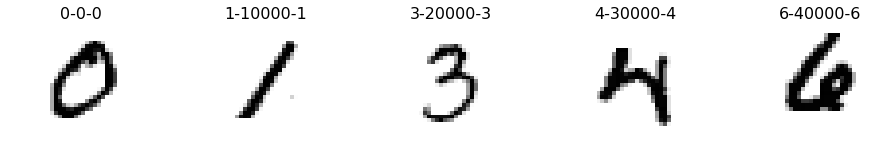

In [19]:
def show_batch(idxs, targets):
    w=10
    h=10
    columns = 5
    rows = len(idxs)//columns
    fig=plt.figure(figsize=(16, rows*2))
    for i in range(1, columns*rows +1):
        idx = idxs[i-1]
        img =  mnist.data[idx].reshape((28,28))
        sp = fig.add_subplot(rows, columns , i)
        sp.axis('Off')
        sp.set_title(str(int(mnist.target[idx]))+'-'+str(idx)+'-'+str(int(targets[i-1])), fontsize=16)
        fig.add_subplot(rows, columns, i) 
        plt.imshow(img, cmap='gray_r')
        
for b in get_batch(range(0,70000,10000), bs=5):
    idxs, targets, nn_imgs, nn_targets = list(zip(*b))
    #print('show images', zipb[2])
    show_batch(idxs, targets)
    #show_batch(range(0,70000,1000))        


In [36]:
net = Mnist()
bs = 50
#idxs = range(0,70000,10000)

x = np.random.permutation(60000)
training_data_index = x[:60000]
validation_data_index = x[50000:]
test_data_index = range(60000, 70000)
idxs = training_data_index

for epoch in range(0,40):
    
    x = np.random.permutation(60000)
    training_data_index = x[:60000]
    validation_data_index = x[50000:]
    test_data_index = range(60000, 70000)
    idxs = training_data_index
    shown = 0
    
    l = 0
    test_total = 0
    test_pred_right = 0
    
    for b in get_batch(idxs, bs):
        idxs, targets, nn_imgs, nn_targets = list(zip(*b))

        #i1, i2 = np.array(mnist.data[0]), np.array(mnist.data[50000])
        #t1, t2 = (numbers == mnist.target[0]).astype(int), (numbers == mnist.target[50000]).astype(int)

        input_tensor  = torch.from_numpy(np.concatenate(nn_imgs).reshape(bs,1,784))
        target_tensor = torch.from_numpy(np.concatenate(nn_targets).reshape(bs,1,10))

        input = torch.autograd.Variable(input_tensor).type(torch.FloatTensor)
        target = torch.autograd.Variable(target_tensor).type(torch.FloatTensor)

        optimizer = optim.SGD(net.parameters(), lr=0.1)
        optimizer.zero_grad()   
        output = net(input)
        criterion = nn.MSELoss()
        loss = criterion(output, target)
        l = loss
        loss.backward() # calculate gradient
        optimizer.step() # update weight
    
    for b in get_batch(test_data_index, bs):
        idxs, targets, nn_imgs, nn_targets = list(zip(*b))
        input_tensor  = torch.from_numpy(np.concatenate(nn_imgs).reshape(bs,1,784))
        input = torch.autograd.Variable(input_tensor).type(torch.FloatTensor)
        output = net(input)
        results = np.max(np.argmax(output.data.numpy(),axis=2), axis=1)
        targets = np.asarray(targets)
        # print('predict results', results, targets, np.sum(results == targets))        
        #if (len(targets) - np.sum(results == targets) > 20 and shown == 0): 
        #    shown = 1
        #    show_batch(idxs, results)
        #    print('data:', results, targets, np.sum(results == targets))
        test_total, test_pred_right = test_total + len(targets),  test_pred_right  + np.sum(results == targets)
    print('loss:', l.data[0], 'accuracy%:', test_pred_right * 100. / test_total )
    
    
    

loss: 0.04013275355100632 accuracy%: 87.69
loss: 0.014668409712612629 accuracy%: 90.44
loss: 0.01880292408168316 accuracy%: 91.46
loss: 0.018750160932540894 accuracy%: 91.89
loss: 0.014478201977908611 accuracy%: 92.31
loss: 0.011017639189958572 accuracy%: 92.83
loss: 0.01531914621591568 accuracy%: 93.1
loss: 0.011744636110961437 accuracy%: 93.15
loss: 0.004065744113177061 accuracy%: 93.5
loss: 0.010687612928450108 accuracy%: 93.12
loss: 0.006565553601831198 accuracy%: 93.75
loss: 0.015942933037877083 accuracy%: 93.79
loss: 0.01028632465749979 accuracy%: 94.18
loss: 0.006764165125787258 accuracy%: 93.84
loss: 0.011488944292068481 accuracy%: 94.03
loss: 0.01147004310041666 accuracy%: 94.11
loss: 0.0065440828911960125 accuracy%: 94.05
loss: 0.013798326253890991 accuracy%: 94.26
loss: 0.006559187546372414 accuracy%: 94.02
loss: 0.013132928870618343 accuracy%: 94.44
loss: 0.005142384208738804 accuracy%: 94.37
loss: 0.014246571809053421 accuracy%: 94.43
loss: 0.0045836372300982475 accuracy%:

In [ ]:
!git gui

In [29]:
np.concatenate([[1,2,3], [4,5,6]])

array([1, 2, 3, 4, 5, 6])

In [25]:
a = np.random.rand(2,1,10)
a

array([[[0.37190485, 0.96047412, 0.93183129, 0.02000278, 0.45956605,
         0.3027824 , 0.95270313, 0.31699268, 0.43772123, 0.78012996]],

       [[0.61587928, 0.43831593, 0.00587506, 0.62621153, 0.18199859,
         0.36457011, 0.12629435, 0.4842171 , 0.85600875, 0.15508576]]])

In [39]:
b = np.argmax(a,axis=2)
b

array([[1],
       [8]], dtype=int64)

In [44]:
np.max(b, axis=1)

array([1, 8], dtype=int64)

In [74]:
b = np.array([1, 2, 4, 3, 5])
a = np.array([1, 2, 3, 4, 5.])
(a == b).sum()

3

In [28]:
a=3
if (a == 3):
    print('hi')

hi
